# Imports

In [503]:
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import MinMaxScaler

TESTING = True

# Classe que representa uma MLP

Implementado de uma maneira vetorizada por mini batch. 

In [837]:
class MLP():
    def __init__(self, dimensions=[], momentum=0.9, classification=True, 
                 lr=0.1, testing=False, use_relu=True):
        self.lr = lr
        self.velocities = []
        self.momentum = momentum
        self.classification = classification
        
        # Initialize fully connected layers
        self.layers = []
        for idx, (input_dim, output_dim) in enumerate(dimensions, 1):
            self.layers.append(self.Linear(input_dim, output_dim))
            # For each linear layer, add a velocity term starting at 0
            self.velocities.append(np.zeros((input_dim, output_dim)))
            if idx != len(dimensions):
                if use_relu:
                    self.layers.append(self.ReLU())
                else:
                    self.layers.append(self.Sigmoid())
            else: # Last layer
                if self.classification:
                    self.layers.append(self.Softmax()) # for the last use softmax
            
        if classification:
            self.cost = self.CrossEntropy()
        else:
            self.cost = self.SquareLoss()
        
    class ReLU():
        def forward(self, x):
            self.old_x = np.copy(x)
            return np.clip(x,0,None)

        def backward(self, grad):
            return np.where(self.old_x>0,grad,0)        
        
    class Sigmoid():
        def forward(self, x):
            # Cip the sigmoid to avoid overflow
            # See https://stackoverflow.com/questions/23128401/overflow-error-in-neural-networks-implementation
            clipped_x = np.clip(x, -500, 500)
            self.old_y = np.exp(clipped_x) / (1. + np.exp(clipped_x))
            return self.old_y

        def backward(self, grad):
            return self.old_y * (1. - self.old_y) * grad

    class Softmax():
        def forward(self,x):
            self.old_y = np.exp(x) / np.exp(x).sum(axis=1) [:,None]
            return self.old_y

        def backward(self,grad):
            return self.old_y * (grad -(grad * self.old_y).sum(axis=1)[:,None])

    class CrossEntropy():
        def forward(self,x,y):
            self.old_x = x.clip(min=1e-8,max=None)
            self.old_y = y
            return (np.where(y==1,-np.log(self.old_x), 0)).sum(axis=1)

        def backward(self):
            return np.where(self.old_y==1,-1/self.old_x, 0)
    
    class SquareLoss():
        def forward(self,x,y, clip=True):
            """We expect the output y to be normalized, therefore
            we clip x to -10, 10. This avoids exploding values in the first
            forward pass.
            
            Since the normalization should give use numbers between -1 and +1, 
            -10 and +10 are good extremes values.
            """
            self.old_x = x.clip(-10, 10)
            self.old_y = y
            if clip:
                return (self.old_x - self.old_y)**2
            else:
                return (self.old_x - self.old_y)**2

        def backward(self):
            return 2*(self.old_x - self.old_y)

    class Linear():
        def __init__(self,n_in,n_out):
            self.weights = np.random.randn(n_in,n_out) * np.sqrt(2/n_in)
            self.biases = np.zeros(n_out)

            self.w_vel = np.zeros((n_in,n_out))
            self.b_vel = np.zeros(n_out)

        def update_velocity(self, w_vel, b_vel):
            self.w_vel = w_vel
            self.b_vel = b_vel

        def forward(self, x):
            self.old_x = x
            return np.dot(x,self.weights) + self.biases

        def backward(self,grad):
            self.grad_b = grad.mean(axis=0)
            self.grad_w = (np.matmul(self.old_x[:,:,None],grad[:,None,:])).mean(axis=0)
            return np.dot(grad,self.weights.transpose())

    def forward(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def loss(self,x,y):
        return self.cost.forward(self.forward(x),y)

    def backward(self):
        grad = self.cost.backward()
        for i in range(len(self.layers)-1,-1,-1):
            grad = self.layers[i].backward(grad)
            
    def fit(self, x, y, n_iter=100, mini_batch=32):
        for _ in range(n_iter):   
            total_loss = 0
            for start_idx in range(0, len(x), mini_batch):
                x_batch = x[start_idx:start_idx+mini_batch]
                y_batch = y[start_idx:start_idx+mini_batch]   
                
                # Forward and backward
                loss = self.loss(x_batch,y_batch)
                total_loss += loss.sum()
                self.backward()
                
                # Update according to momentum
                for layer in self.layers:
                    if type(layer) == self.Linear:
                        new_w_vel = self.momentum*layer.w_vel + self.lr*layer.grad_w
                        new_b_vel = self.momentum*layer.b_vel + self.lr*layer.grad_b
                        
                        layer.weights -= new_w_vel
                        layer.weights -= new_b_vel
                        
                        layer.update_velocity(new_w_vel, new_b_vel)
            print(total_loss/len(x))

    def predict(self, x):
        output = self.forward(x)
        if self.classification:
            return output.argmax(axis=-1)                       
        else:
            return output

Temos 0 nulos na nossa tabela


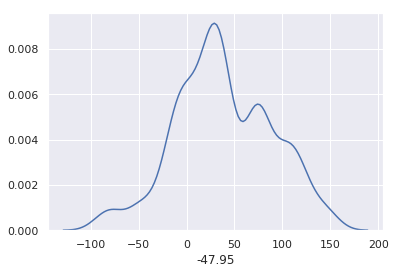

In [904]:
TARGET = "category"
x, y = load_and_analyze("default_features_1059_tracks.txt", target="69")
idx = np.zeros
new_x = 

In [907]:
y

0       -23.51
1        -8.00
2        38.74
3        -6.85
4        -8.00
5        -8.00
6       -17.41
7        -0.12
8        69.21
9        69.21
10       12.48
11       77.20
12       73.16
13       25.31
14       26.10
15       26.10
16       -0.12
17       26.10
18       26.10
19       26.10
20       26.10
21       26.10
22       26.10
23       26.10
24       26.10
25        3.21
26        3.21
27       38.74
28       32.83
29       32.83
         ...  
1028     12.48
1029     12.48
1030     12.48
1031     23.71
1032     23.71
1033     23.71
1034     23.71
1035    -47.95
1036    -47.95
1037    -47.95
1038    -23.51
1039    -23.51
1040    -23.51
1041     69.21
1042     69.21
1043     69.21
1044    149.12
1045    139.71
1046    -88.76
1047     -0.12
1048     -0.12
1049     -0.12
1050     44.78
1051     44.78
1052     35.74
1053     35.74
1054    104.91
1055     19.80
1056     25.31
1057     25.31
Name: -47.95, Length: 1058, dtype: float64

In [649]:
delim = int(len(x)/2)
x_train = x.iloc[:delim]
x_test = x.iloc[delim:]

In [650]:
x_train, x_test, scaler, y = normalize_data(x_train, x_test, 
                                            y.values.reshape(-1, 1))
y_train = y[:delim]
y_test = y[delim:]

In [654]:
#t = MLP(dimensions=[(x.shape[1], 2), (2, 3)], classification=True)
t = MLP(dimensions=[(x.shape[1], 16), (16, 1)], classification=False, lr=0.1,
       momentum=0.5)
t.fit(x_train, y_train, n_iter=100, mini_batch=8)
#t.fit(x.values, y.values.reshape(-1, 1), n_iter=1)

76.05266266192062
80.05226119045334
94.07172662773166
89.04027195721024
82.66242231917161
72.30061476668274
85.96108847350654
83.03464557765702
86.64568619286746
92.87714072533764
86.58677111235788
88.08984100741102
85.89367615270781
89.19509157000945
84.18335278712298
84.09367166684264
81.27507251624384
88.14262314711115
87.83159901145702
89.41969072550637
86.9882331986585
87.85446073402883
89.28291824712832
89.5958811306313
87.84364214631553
84.61896266297691
86.41052611848666
89.83541592191114
85.55843799301168
81.27648952802005
84.22684038570914
85.18911193676193
82.9599036169622
78.4938401500473
89.27122957334736
85.60733935499627
87.41889756135213
90.30735355393486
96.16001809485982
86.34700615954381
82.42886611032843
87.90766938851546
87.6944216707435
86.23139413024018
83.45780176086303
83.58133470414015
83.19814179768994
82.45420825839196
91.24429230060777
90.19873117915246
84.83246749342398
96.29285056030882
86.78415421581182
83.76483613630403
94.0034190646721
88.2410893694394

In [ ]:
t.c

6.1e-05

Temos 0 nulos na nossa tabela


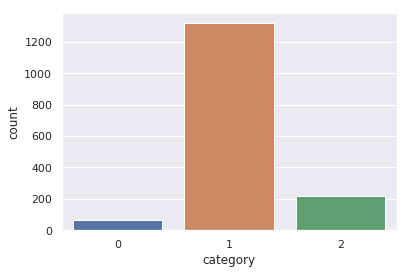

In [987]:
TARGET = "category"
df = pd.read_csv("winequality-red.csv")
old_x, old_y = load_and_analyze("winequality-red.csv", target=TARGET)

idx = (old_y - 1).astype(bool)

x = old_x.copy(deep=True)[idx]
x = x.append(old_x[~idx].sample(200))

y = old_y.loc[x.index]

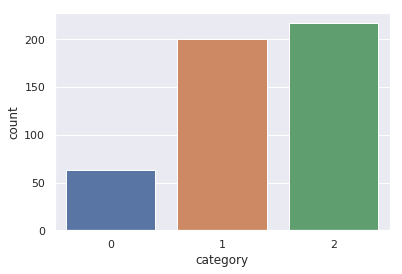

In [988]:
sns.countplot(y)

In [989]:
x.reset_index(inplace=True, drop=True)
y.reset_index(drop=True, inplace=True)
x = x.sample(frac=1)
y = y.sample(frac=1)

In [990]:
delim = int(len(x)/2)
x_train = x.iloc[:delim]
x_test = x.iloc[delim:]

In [991]:
x_train, x_test = normalize_data(x_train, x_test)
y_dummies = pd.get_dummies(y)
y_train = y_dummies[:delim]
y_test = y_dummies[delim:]

In [1004]:
#t = MLP(dimensions=[(x.shape[1], 2), (2, 3)], classification=True)
#t = MLP(dimensions=[(x.shape[1], 64), (64, 3)], classification=True, lr=0.1,
t = MLP(dimensions=[(x.shape[1], 32), (32, 3)], classification=True, lr=0.1,
       momentum=0.5, use_relu=True)
t.fit(x_train, y_train.values, n_iter=1000, mini_batch=8)
#t.fit(x.values, y.values.reshape(-1, 1), n_iter=1)

2.2468517763724325
8.063841325914646
11.801085172026522
13.305947660172697
11.6637652232076
11.561685088084886
11.486553976891624
11.405991980712772
11.535181995468442
11.497780059703643
11.473683488304468
11.459434552182877
11.452789988618212
11.449774493441634
11.448065927426756
12.046550323523661
11.488371117263771
11.458761877283566
11.448946236460126
11.446176979963917
11.444842783077057
11.443888723945802
11.443129544788055
11.442516115920974
11.441993526150936
11.441533629523464
11.441131388641065
11.440746844257593
11.440447811814083
11.440132704634314
11.439874190240822
11.439639223610993
11.439423994891373
11.439229271571245
11.439054351123765
11.438884031091408
11.438751989607384
11.438604686402373
11.438492346063686
11.438370824170114
11.438262959363367
11.438174273846945
11.438079153032819
11.438001435851085
11.437918688843014
11.437851592318651
11.437781236025181
11.437720433964648
11.437662742406472
11.437607356385595
11.437556658620611
11.43750586734337
11.4374630771966

11.436232258161539
11.436232116280852
11.436231957303798
11.436231773447531
11.436231652773925
11.436231474402831
11.43623133657381
11.436231165099558
11.436231023610494
11.436230868056237
11.436230713244031
11.436230560811824
11.436230419183085
11.436230268922891
11.436230098443012
11.436229976859288
11.436229811211483
11.436229683546836
11.436229519285472
11.436229383823651
11.436229234678192
11.436229092894997
11.436228949359496
11.436228812851164
11.436228661316852
11.436228517564494
11.43622839365988
11.436228236133436
11.436228105038087
11.436227968500619
11.436227830763876
11.43622769045172
11.436227551498886
11.436227417506945
11.43622729063422
11.43622714200735
11.436227011065167
11.436226885063679
11.436226746896352
11.436226616948103
11.436226486355471
11.436226354481441
11.436226228545754
11.43622609039981
11.436225964282507
11.436225838882843
11.436225697039955
11.436225590616097
11.436225454903166
11.436225323297561
11.436225199641735
11.436225090023902
11.436224950758636

11.436199522339122
11.436199485195903
11.436199455505655
11.436199422186725
11.436199389954226
11.436199354454027
11.43619932423262
11.436199292812885
11.43619925679261
11.43619922651754
11.436199195078053
11.436199161382364
11.436199129189948
11.436199099367089
11.436199065975334
11.436199034174292
11.436198999907857
11.436198973326254
11.436198941707229
11.436198905796703
11.436198877011273
11.4361988456817
11.436198814051178
11.436198784444283
11.436198749829124
11.43619872066165
11.43619868999645
11.43619865944845
11.436198625914038
11.43619859833652
11.436198566597263
11.436198532615258
11.436198507832833
11.43619847591707
11.436198443528589
11.436198413704881
11.436198385271299
11.43619835370404
11.43619832527238
11.436198290329028
11.436198267402839
11.43619823589997
11.436198202810422
11.43619817498783
11.436198145340844
11.436198115974467
11.436198087048114
11.43619805612286
11.436198026773202
11.43619799812915
11.436197968525581
11.436197941323247
11.436197912338198
11.436197

    Train

In [1005]:
accuracy_score(y.iloc[:delim], t.predict(x_train))

0.5

In [1006]:
accuracy_score(y.iloc[delim:], t.predict(x_test))

0.42083333333333334

In [1007]:
t.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1008]:
t.predict(x_train)

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [798]:
#temp = np.random.rand(*y_train.shape)
#weights = np.ones(len(y_train))
#weights[y_train.values[:,1]!=1] = 2
#weights = weights.reshape(-1, 1)

Teste

In [964]:
accuracy_score(y.iloc[delim:], t.predict(x_test))

0.1

In [965]:
accuracy_score(y.iloc[delim:], np.ones(len(x_test)))

0.8333333333333334

In [974]:
accuracy_score(y_test.values.argmax(axis=1), t.predict(x_test))

0.1

In [640]:
all_one = np.zeros_like(y_train)
all_one[:, 1] = 1
t.cost.forward(all_one, y_train).sum() / len(y_train)

2.512958950051074

In [641]:
t.cost.forward(t.forward(x_test), y_test).sum() / len(y_test)

1.1461805238012028

In [642]:
all_one = np.zeros_like(y_test)
all_one[:, 1] = 1
t.cost.forward(all_one, y_test).sum() / len(y_test)

3.9374205090198187

In [647]:
(y_test.values[:, 1] != 1).sum() 

171

In [836]:
weights = np.ones(len(y_train))
weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Funções auxiliares

Diversas funções que seram utilizadas para ambos os datasets

Função para carregar os dados

In [163]:
def load_and_analyze(filename, target, header=0):
    df = pd.read_csv(filename, header=header)
    if "Unnamed: 0" in df.columns:
        df.drop(columns=["Unnamed: 0"], inplace=True) 
    
    # Check for nulls
    print(f"Temos {df.isna().sum().sum()} nulos na nossa tabela")
    
    if target == "category":
        df["category"] = df["category"].map({"Bad":0, "Mid":1, "Good":2})
        sns.countplot(df["category"])
        x = df.drop(columns=[target])
        y = df[target]
    else:
        x = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        sns.distplot(y, hist=False)
    plt.show()

    return x, y

Função  para normalizar os dados que vamos utilizar posteriormente

In [502]:
def normalize_data(x_train, x_test, y=None):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    x_train_norm = scaler.fit_transform(x_train)
    x_test_norm = scaler.transform(x_test)
    
    if y is not None:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        y = scaler.fit_transform(y)
        return x_train_norm, x_test_norm, scaler, y
    else:
        return x_train_norm, x_test_norm

Função para rodar 1 experimento

In [229]:
def run_experiment(x, y, test_percent, hidden_layers, cicles, lr, momentum,
                  classification=True):
    start_time = time.time()
    
    # Process our data and normalize
    if classification:
        y_dummies = pd.get_dummies(y)
    else:
        y_dummies = y.values.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y_dummies, stratify=y, 
                                                       test_size=test_percent)
    x_train, x_test = normalize_data(x_train, x_test)

    # Create model
    dimensions = [(x.shape[1], 32)]
    if hidden_layers > 1:
        dimensions += [(32, 4), (4, y_dummies.shape[1])]
    else:
        dimensions += [(32, y_dummies.shape[1])]
    mlp = MLP(dimensions=dimensions, momentum=momentum, lr=lr, 
             classification=classification)
    
    # Train and evaluate
    if classification:
        mlp.fit(x_train, y_train.values, n_iter=cicles)
    else:
        mlp.fit(x_train, y_train, n_iter=cicles)
    preds = mlp.predict(x_test)
    
    if classification:
        score = accuracy_score(y_test.values.argmax(axis=-1), preds)
    else:
        score = mean_squared_error(y_test.values, preds)
    end_time = time.time()
    
    return score, end_time-start_time
    

Roda todos os nossos experimentos

In [230]:
def run_various_experiments(x, y, classification=True):
    # Default values
    cols = ["hidden_layers", "cicles", "momentum", "lr", "test_percent"]
    temp = [1, 1000, 0.9, 0.1, 0.3]
    default = {col:val for col, val in zip(cols, temp)}

    # Values to be tested
    temp = [ [1, 2], [10, 100, 1000, 10000], [0.5, 0.7, 0.9, 0.95, 0.97, 0.99],
            [0.01, 0.1, 1, 10], [0.1, 0.3, 0.5]]
    test_values = {col:val for col, val in zip(cols, temp)}

    # Dictionary of results
    results_cols = ["Accuracy", "Time", "Value"]
    results = {col:pd.DataFrame(columns=results_cols) 
                   for col in cols}

    for name, values in test_values.items():
        params = {key:value for key, value in default.items() if key != name}
        params["classification"] = classification
        if TESTING: # A global testing flag for quickly prototyping
            params["cicles"] = 1
        for value in values:
            params[name] = value
            acc, runtime = run_experiment(x, y, **params)
            results[name].loc[len(results[name])] = [acc, runtime, value]
            break
        break
    return results



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Classificação - winequality-red.csv 

Temos 0 nulos na nossa tabela


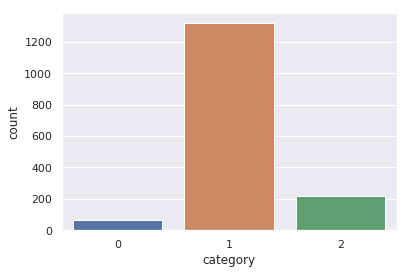

In [196]:
TARGET = "category"
x, y = load_and_analyze("winequality-red.csv", target=TARGET)

In [168]:
results = run_various_experiments(x, y)



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Regressão - default_features_1059_tracks.txt

Temos 0 nulos na nossa tabela


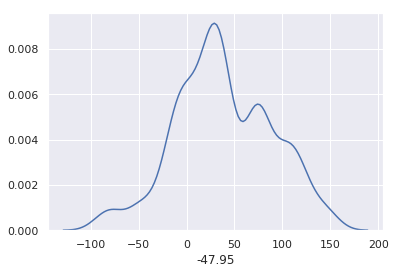

In [169]:
TARGET = "category"
x, y = load_and_analyze("default_features_1059_tracks.txt", target="69")

In [232]:
results = run_various_experiments(x, y, classification=False)

AttributeError: 'NoneType' object has no attribute 'mean'

In [234]:
t = MLP(dimensions=[(x.shape[1], 2), (2, 1)], classification=False)
t.fit(x, y)

AttributeError: 'NoneType' object has no attribute 'mean'

In [235]:
t.cost.forward(y, np.random.rand(len(y)))

AttributeError: 'Series' object has no attribute 'reshape'

In [185]:
t.forward(x)

array([[0.77555923],
       [0.79212   ],
       [0.97835761],
       ...,
       [0.76372286],
       [0.77309943],
       [0.91873706]])